# TFM. Modelo
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Modelo

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
reg = LinearRegression()

In [5]:
#X = df_explore.loc[:,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
X = df_data.iloc[:,1:-1]
y = df_data['dateCreacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
reg.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = reg.predict(X_test)

In [8]:
mean_absolute_error(y_test, y_pred)

107.74382419890304

In [9]:
analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['dateCreacion']

analisisPre = reg.predict(X)
analisisPre = pd.DataFrame(analisisPre)
#analisisX, analisisPre

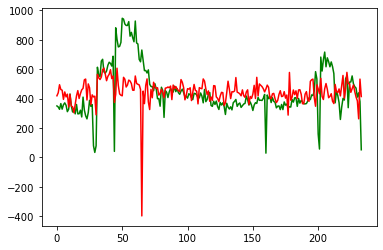

In [10]:
plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [12]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(3,50)})

In [13]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [14]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 49}, -0.7961856089092383)

In [15]:
regk = KNeighborsRegressor(n_neighbors=3)

In [16]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [17]:
y_predk = regk.predict(X_test)

In [18]:
#MAE
mean_absolute_error(y_test, y_predk)

102.87943262411349

In [19]:
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean()

-127.04363243909958

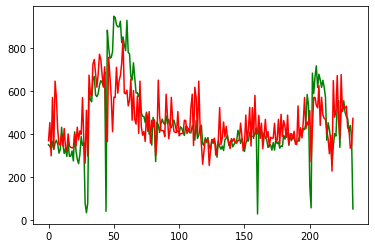

In [20]:
analisisPre = regk.predict(X)
analisisPre = pd.DataFrame(analisisPre)
analisisPre

plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')